In [46]:
# Useful starting lines
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from implementations import *
%load_ext autoreload
%autoreload 2
%matplotlib notebook


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [47]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [6]:
y.shape, tX.shape


((250000,), (250000, 30))

## Do your thing crazy machine learning thing here :) ...

## Gradient Descent test:

In [4]:
"""taken from ex02:"""
# from gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 1e-9

# Initialization
w_initial = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
#A=tX[0:30]
#b=y[0:30]
#w_initial=np.linalg.lstsq(A,b,rcond=None)[0]
print(np.shape(tX))

b=variance_half_max_index(tX)
tX1=tX[:,b]
print(np.shape(tX1))

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_w, gradient_loss = least_squares(y, tX1)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
print("gradient loss = ", gradient_loss, "\n W = ",gradient_w)

(250000, 30)
(250000, 24)
Gradient Descent: execution time=0.051 seconds
gradient loss =  0.3559770984135593 
 W =  [ 2.26971848e-04  6.56522489e-04 -2.07872311e-03  2.66859544e+00
  3.25911884e-04  2.67330024e+00  5.00287345e-03 -9.31223839e-03
 -1.75704625e-03 -2.00046630e-03  2.66082659e+00 -2.66378165e+00
 -6.79222194e-04  2.79992082e-04 -3.52941170e-02 -6.10160688e-03
 -1.00960843e-02  1.08584292e-01 -5.86224270e-02  1.14536818e-03
 -4.51466862e-04 -1.26157626e-03  1.86677641e-03  5.58306206e-04]


## Least squares (using normal equations) test:

In [5]:
# Start.
start_time = datetime.datetime.now()
weights, loss = least_squares(y, tX)
end_time = datetime.datetime.now()

# Print result

exection_time = (end_time - start_time).total_seconds()
print("Least squares: execution time={t:.3f} seconds".format(t=exection_time))
print("Loss = ", loss, "\n W = ", weights)

Least squares: execution time=0.495 seconds
Loss =  0.3396868094770345 
 W =  [ 8.03494350e-05 -7.20202266e-03 -6.05417273e-03 -5.47559077e-04
 -1.93874687e-02  4.73451613e-04 -2.60379057e-02  3.25106299e-01
 -3.80780015e-05 -2.72785402e+00 -2.21220141e-01  9.50794097e-02
  6.40351607e-02  2.73611370e+00 -3.31801097e-04 -9.54325136e-04
  2.74087044e+00 -5.34165258e-04  9.73498900e-04  3.69225050e-03
  3.54487183e-04 -5.43344617e-04 -3.30448035e-01 -1.40800497e-03
  8.31432840e-04  1.02117276e-03 -1.68047418e-03 -5.83664795e-03
 -1.11088002e-02  2.72831395e+00]


## Ridge regression (using normal equations) test:

In [6]:
lambda_ = 0.5

# Start.
start_time = datetime.datetime.now()
weights, loss = ridge_regression(y, tX, lambda_)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Least squares: execution time={t:.3f} seconds".format(t=exection_time))
print("Loss = ", loss, "\n W = ", weights)

Least squares: execution time=0.461 seconds
Loss =  0.3516066841491274 
 W =  [ 2.48519324e-04 -8.96465390e-03 -2.24753247e-03 -2.19688733e-03
 -8.28785858e-04  5.27482033e-04 -1.23580011e-02  2.78401608e-02
  6.37660259e-05  3.17281194e-03 -2.55552723e-02  4.56064526e-02
  1.07748012e-02  6.17277403e-03 -3.38880835e-04 -1.20732147e-03
  2.51582382e-03 -4.25916162e-04  8.32986709e-04  4.90332267e-03
  4.17025377e-04 -7.70891369e-04 -2.48302577e-02  1.45686817e-03
 -7.63838506e-04 -5.43201301e-04  2.59945303e-04  1.61198112e-03
  1.83180262e-04 -5.51499664e-03]


## Polynomial:

(250000, 45)
0.954993036023713
(2000,)
shape of to_plot : (2000,)
0.10219811171793601
23.59411766318013
36336.450325001235
1.968450841128295


<IPython.core.display.Javascript object>


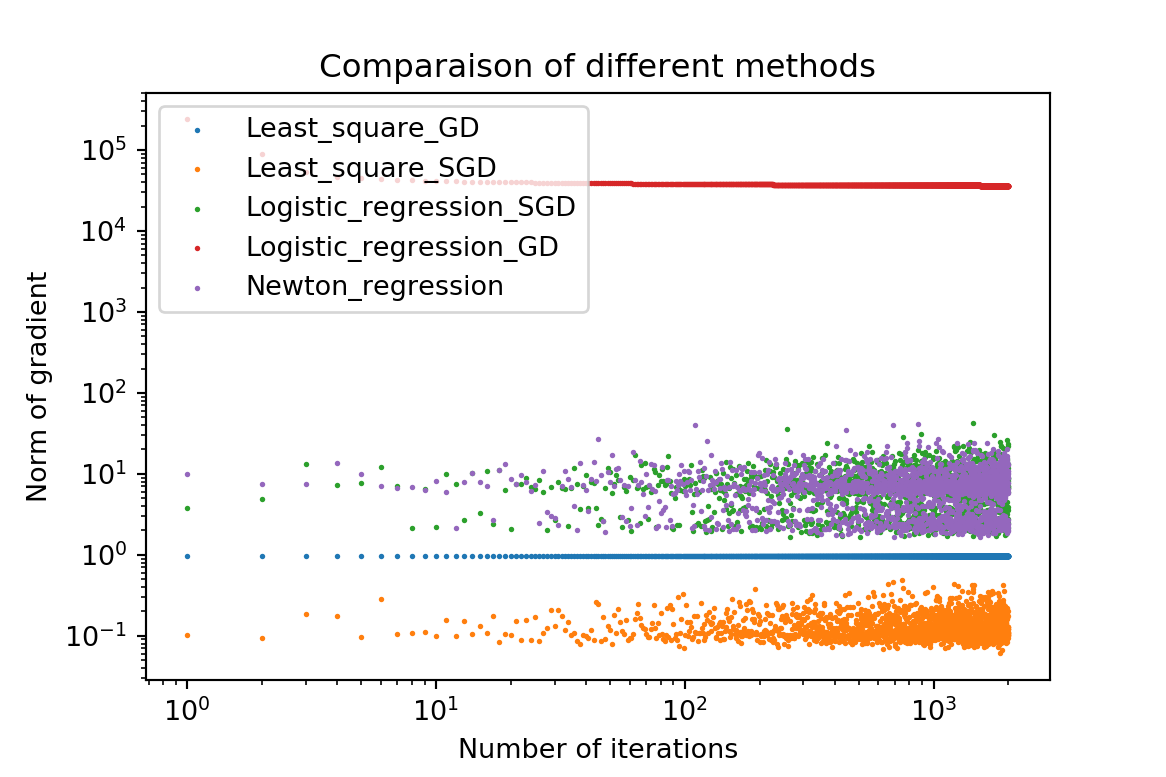

<IPython.core.display.Javascript object>


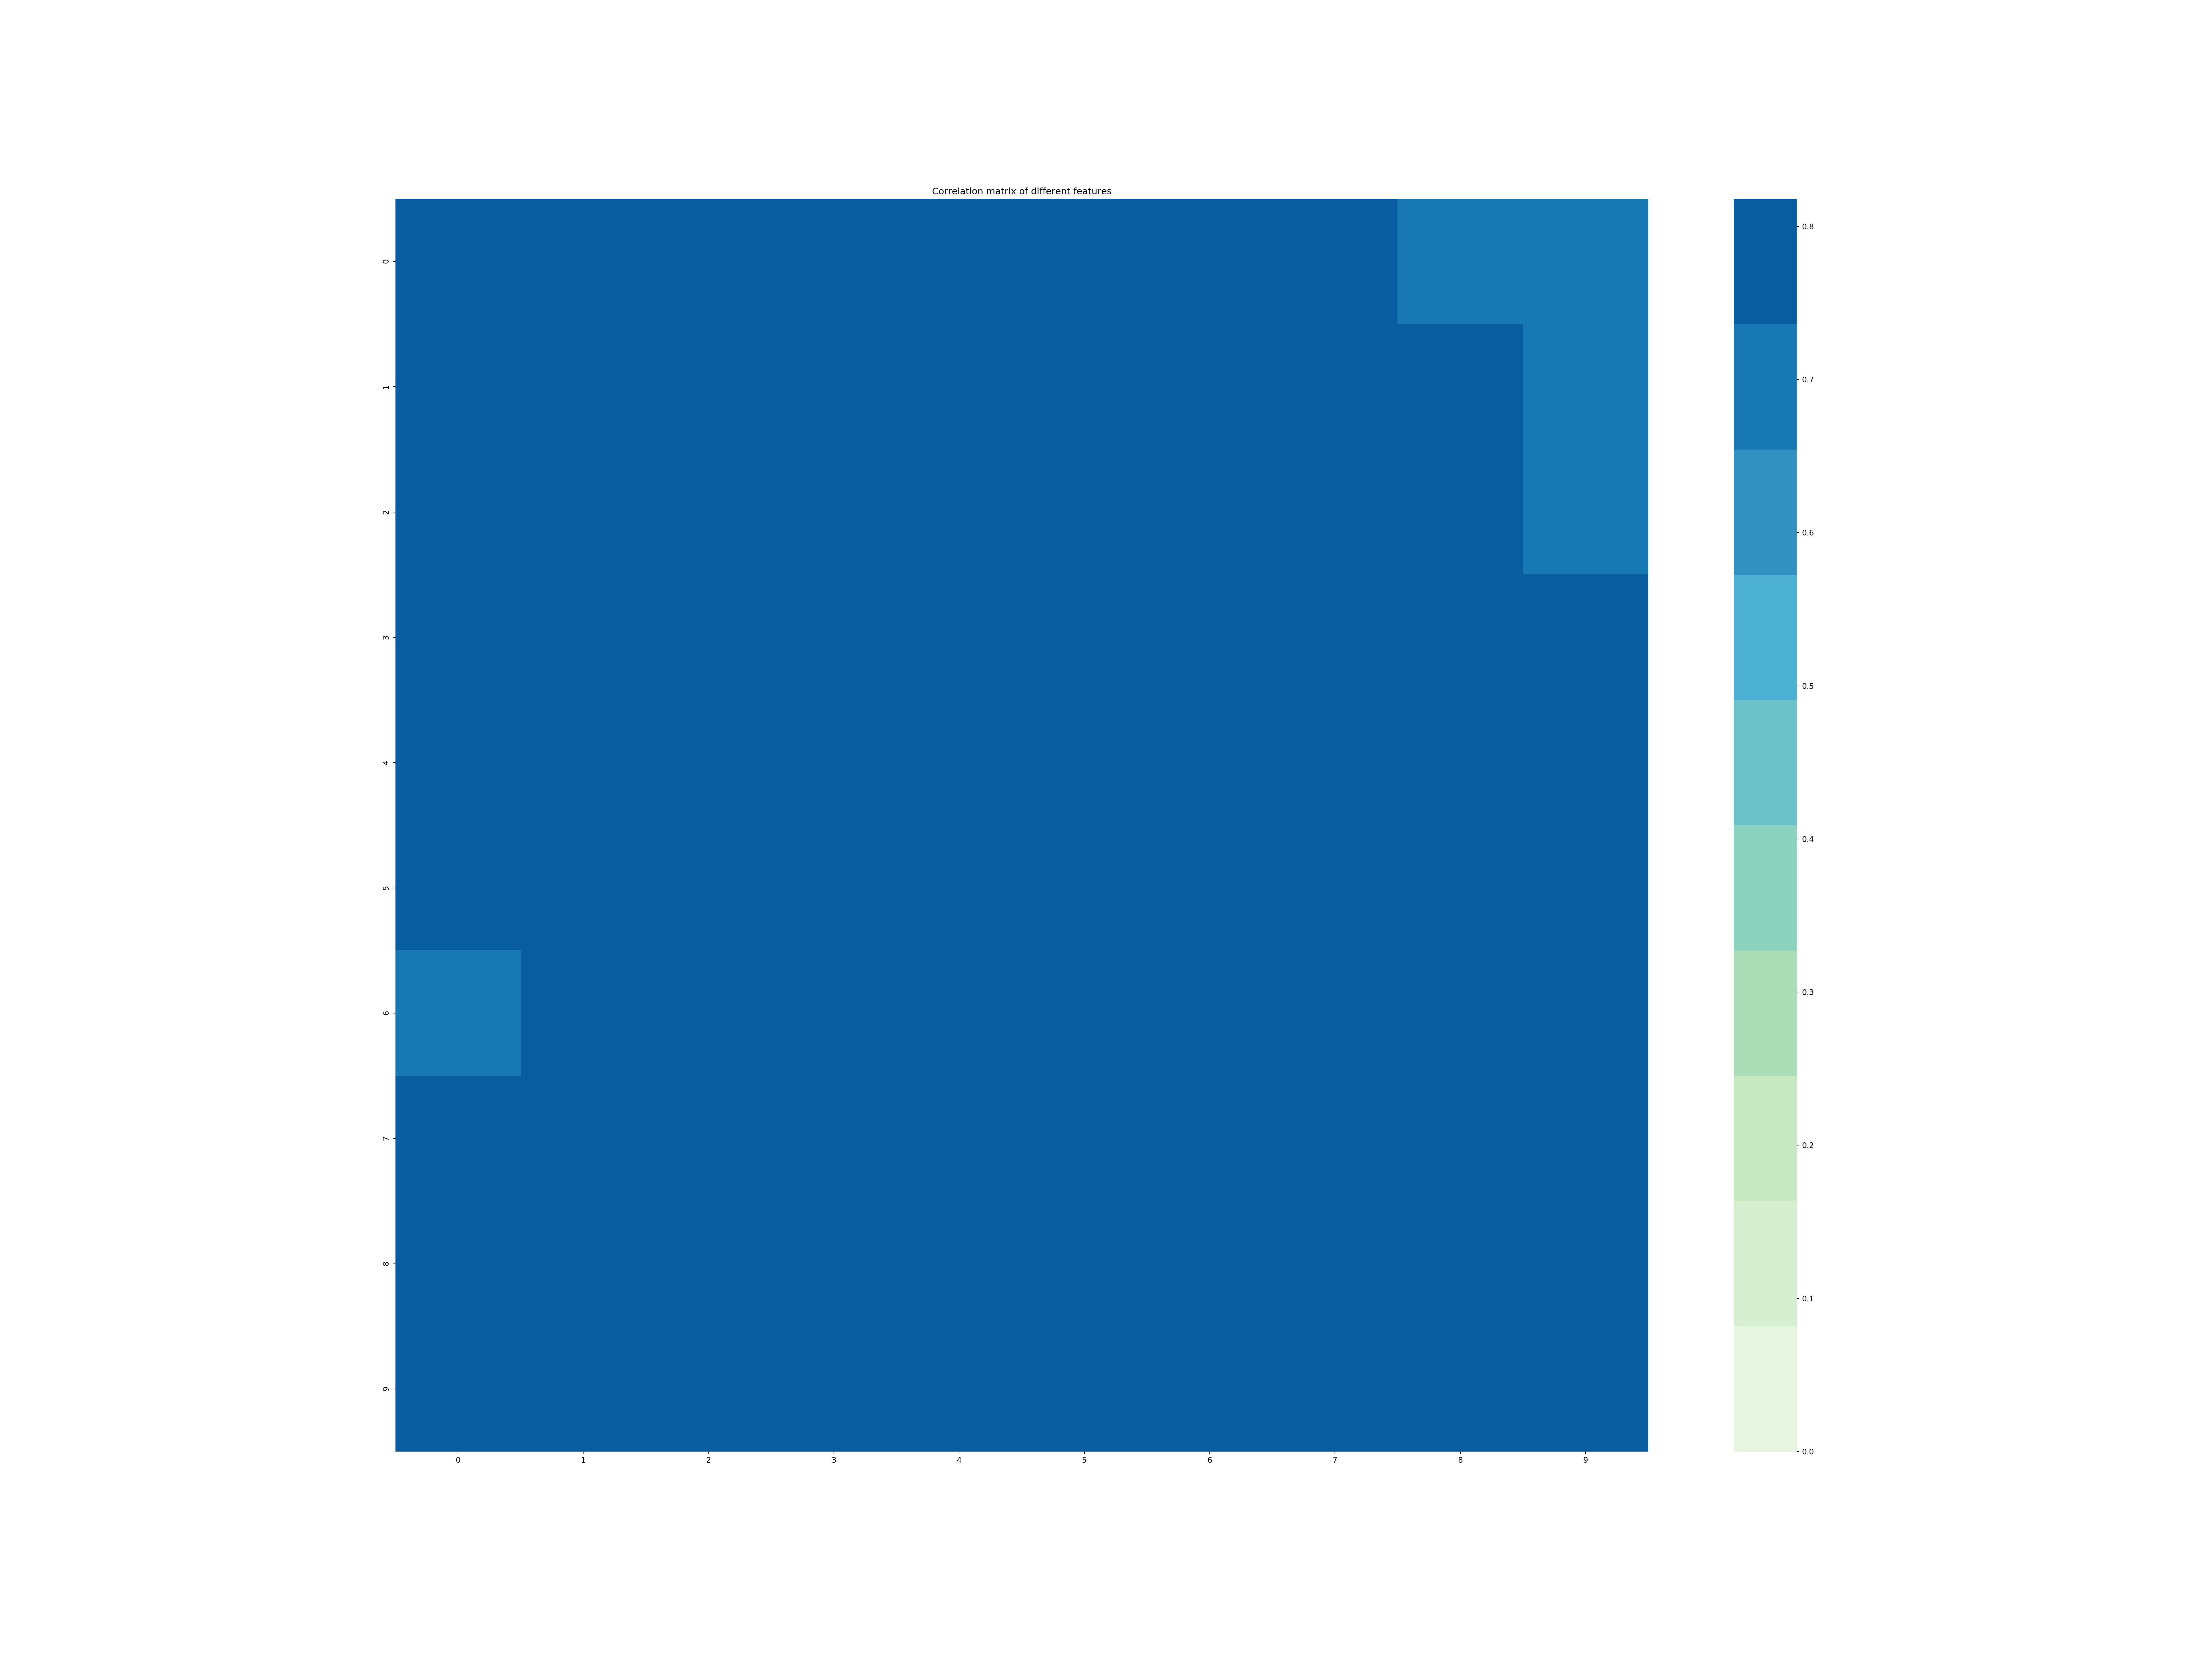

In [14]:
tX_1=(replace_999_data_elem(tX))
features=get_uncorrelated_features(tX_1)
tX_1=tX_1[:,features]
positive_columns=get_higher_minus_1(tX_1)

tX_2=log_inv(tX_1[:,positive_columns])
tX_1=np.concatenate((tX_1,tX_2),axis=1)
tX_1=standardize(tX_1)
    
print(np.shape(tX_1))
gamma=1e-5
max_iters=2000
gradient_w, gradient_loss,to_plot_degree_0=least_squares_GD(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma,True)
print(to_plot_degree_0[-1])
gradient_w, gradient_loss,to_plot_degree_1=least_squares_SGD(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma,True)
print(np.shape(to_plot_degree_1))
print("shape of to_plot :" ,np.shape(to_plot_degree_1))
print(to_plot_degree_1[-1])
gradient_w, gradient_loss,to_plot_degree_2=logistic_regression_S(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma,True)
print(to_plot_degree_2[-1])
gradient_w, gradient_loss,to_plot_degree_3=logistic_regression(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma,True)                                                             
print(to_plot_degree_3[-1])
gradient_w, gradient_loss,to_plot_degree_4=newton_logistic_regression_s(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma,True)                                                             
print(to_plot_degree_4[-1])
#plt.plot(np.linspace(1,len(to_plot_degree_0),len(to_plot_degree_0)),to_plot_degree_0,label='Least_square_GD')
plt.scatter(np.linspace(1,len(to_plot_degree_0),len(to_plot_degree_0)),to_plot_degree_0,s=1,label='Least_square_GD')
#plt.plot(np.linspace(1,len(to_plot_degree_1),len(to_plot_degree_1)),to_plot_degree_1,label='Least_square_SGD')
plt.scatter(np.linspace(1,len(to_plot_degree_1),len(to_plot_degree_1)),to_plot_degree_1,s=1,label='Least_square_SGD')

#plt.plot(np.linspace(1,len(to_plot_degree_2),len(to_plot_degree_2)),to_plot_degree_2,label='Logistic_regression_SGD')
plt.scatter(np.linspace(1,len(to_plot_degree_2),len(to_plot_degree_2)),to_plot_degree_2,s=1,label='Logistic_regression_SGD')

#plt.plot(np.linspace(1,len(to_plot_degree_3),len(to_plot_degree_3)),to_plot_degree_3,label='Logistic_regression_GD')
plt.scatter(np.linspace(1,len(to_plot_degree_3),len(to_plot_degree_3)),to_plot_degree_3,s=1,label='Logistic_regression_GD')


#plt.plot(np.linspace(1,len(to_plot_degree_4),len(to_plot_degree_4)),to_plot_degree_4,label='Newton_regression')
plt.scatter(np.linspace(1,len(to_plot_degree_4),len(to_plot_degree_4)),to_plot_degree_4,s=1,label='Newton_regression')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Norm of gradient')
plt.title('Comparaison of different methods')

plt.figure(figsize=(40,30))
plt.show()

In [1]:
lambda_ = 0.000


## Logistic Regression

In [1]:
#Start
start_time = datetime.datetime.now()
y_train,y_train_test,tx_train,tx_train_test = split_data_train_test(y,tX,0.90)
weights, loss = logistic_regression( np.transpose(np.matrix(y_train)), standardize(tx_train), np.zeros((tX.shape[1],1)), 200, 1e-9)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Logistic Regression: execution time={t:.3f} seconds".format(t=exection_time))
print("Accuracy = ", compute_loss(y_train_test,tx_train_test,weights))

NameError: name 'datetime' is not defined

## Generate predictions and save ouput in csv format for submission:

In [8]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test1, ids_test = load_csv_data(DATA_TEST_PATH)

In [5]:
#tX,tX_test=replace_999_data_elem(tX,tX_test)
lambda_ = 0.001


#tX_1,tX_test=replace_999_data_elem(tX,tX_test1)
tX_1=replace_999_data_elem(tX)


features=get_uncorrelated_features(tX_1)
tX_test=replace_999_data_elem(tX_test1)
#### on prend que les features importants pas ceux qui sont correlés à plus de 90% avec les autres
tX_1=tX_1[:,features]

tX_test=tX_test1[:,features]
#index_variance=sorted_by_variance(tX)
#tX=tX[:,index_variance]
#tX_test=tX_test[:,index_variance]
#print ('Covariance matrix:\n', ACov)
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 10)

ax0 = plt.subplot(2, 2, 1)
plt.title("Correlation matrix of different features")
# Choosing the colors
cmap = sns.color_palette("GnBu", 10)
sns.heatmap(calculateCovariance(replace_999_data_elem(tX),0), cmap=cmap, vmin=0)
#plt.imshow(calculateCovariance(tX,1), cmap='Greys',  interpolation='nearest')

ax1 = plt.subplot(2, 2, 2)
plt.title("Correlation matrix with black box when values exceed 90%")
# data can include the colors
plt.imshow(calculateCovariance(replace_999_data_elem(tX),True), cmap='Greys',  interpolation='nearest')

# Remove the top and right axes from the data plot
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#creation of segmentation train and train_test 90% / 10%
y_train,y_train_test,tx_train,tx_train_test=split_data_train_test(y,tX_1,0.90)

#calculate of the weights with the train part 
#tx_train_poly=build_poly(tx_train,5)
tX_train_poly=build_poly_variance(tx_train,0,8,8,8,8,8)

features_poly=get_uncorrelated_features(tX_train_poly)
#print("shape tX_train_poly :",np.shape(tX_train_poly))
#tX_train_poly=tX_train_poly[:,features_poly]
#print("shape tX_train_poly after :",np.shape(tX_train_poly))


weights, loss = ridge_regression(y_train, tX_train_poly, lambda_)
#tX_train_test_poly=build_poly(tx_train_test,5)
tX_train_test_poly=build_poly_variance(tx_train_test,0,8,8,8,8,8)
#tX_train_test_poly=tX_train_test_poly[:,features_poly]
print("train test :", np.shape(tX_train_test_poly))
print("Test: Loss = ", compute_loss(y_train_test, tX_train_test_poly, weights))
print("Test: Real  accuracy = ", compute_loss_binary(y_train_test,tX_train_test_poly,weights))


tX_test_poly = build_poly_variance(tX_test,0,8,8,8,8,8)
#0.28631
#0.2853

NameError: name 'tX_test1' is not defined

In [32]:
OUTPUT_PATH = '../data/result.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined

In [33]:
loss,best_array=test_find_degree(y_train,y_train_test,tx_train,tx_train_test)
print("Loss = ", loss, "\n best_array = ", best_array)

NameError: name 'test_find_degree' is not defined

In [34]:
features=get_uncorrelated_features(tX)
#print(features)
#print(len(features[0]))
print(features)
print(len(features))
print("y shape", np.shape(y))
print("tX shape", np.shape(tX))
print(calculateCovariance_y_tX(tX,y))

[ 0  1  2  3  4  7  8  9 10 11 13 14 15 16 17 18 19 20 22 23]
20
y shape (250000,)
tX shape (250000, 30)
(array([0]),)


In [4]:
lambda_=0.0
tX_1=replace_999_data_elem(standardize(tX))
features=get_uncorrelated_features(tX_1)
tX_test=replace_999_data_elem(tX_test1)
print(features)
#### on prend que les features importants pas ceux qui sont correlés à plus de 90% avec les autres
tX_1=tX_1[:,features]

tX_test=tX_test1[:,features]
y_train,y_train_test,tx_train,tx_train_test=split_data_train_test(y,tX_1,0.90)

tX_train_poly=build_poly_variance(tx_train,0,1,1,1,1,1)
tX_train_test_poly=build_poly_variance(tx_train_test,0,1,1,1,1,1)
#Define initial values 
initial_w=np.zeros(np.shape(tX_train_poly)[1])
#on change ici parce qu'on applique comme dans le cours avec des 0 ou des -1.
y_train=np.where(y_train==-1,0,1)
max_iters=int(5e6)
gamma=1e-8
weights,loss=newton_logistic_regression_s(y_train, tX_train_poly, initial_w, max_iters, gamma)
print("loss",loss)
print("real accuracy: ",compute_loss_binary(y_train_test,tX_train_test_poly,weights))
#print("train test :", np.shape(tX_train_test_poly))
#print("Test: Loss = ", compute_loss(y_train_test, tX_train_test_poly, weiughts))


NameError: name 'tX_test1' is not defined

In [48]:
lambdas=np.linspace(1e-6,1e-4,20,True)
degrees=[5+i for i in range(8)]
print("quelle vie de merde")
maximum=np.zeros(2)
max_value=0
for lambda_1 in lambdas: 
    for degree in degrees:
        value_of_test=test_fct(tX,y,lambda_1,degree)
        if max_value<=value_of_test:
            print("hello")
            max_value=value_of_test
            print(max_value)
            print(maximum)
            maximum[0]=lambda_1
            maximum[1]=degree
        

""""lambdas=np.zeros(10)
results=np.zeros((10,10))
lambdas[1]=1e-7
for i in range(2,10):
    lambdas[i]=lambdas[i-1]*10
for j in range(1,11):
    for i in range(10):
        results[j-1,i]=test_fct(tX,y,lambdas[i],j)

plt.imshow(results)
print("our maximum accuracy is : " ,np.max(results))
indexs=zip(*np.where(results == np.max(results)))
indexs=list(indexs)
print(indexs)
print("The value of lambdas = ", lambdas[indexs[0][1]], " and the value of j :" , indexs[0][0]+1)
plt.title("Correlation matrix of different features")
# Choosing the colors
cmap = sns.color_palette("GnBu", 10)
sns.heatmap(results, cmap=cmap, vmin=0)
plt.show()"""

#1e-7 et 9 
    
    

quelle vie de merde
hello
0.81164
[0. 0.]
hello
0.81336
[1.e-06 5.e+00]
hello
0.81628
[1.e-06 6.e+00]
hello
0.81696
[1.e-06 7.e+00]
hello
0.8195600000000001
[1.e-06 8.e+00]
hello
0.8196
[1.e-06 1.e+01]
hello
0.81968
[3.22631579e-05 1.00000000e+01]
hello
0.8198
[4.26842105e-05 1.00000000e+01]


'"lambdas=np.zeros(10)\nresults=np.zeros((10,10))\nlambdas[1]=1e-7\nfor i in range(2,10):\n    lambdas[i]=lambdas[i-1]*10\nfor j in range(1,11):\n    for i in range(10):\n        results[j-1,i]=test_fct(tX,y,lambdas[i],j)\n\nplt.imshow(results)\nprint("our maximum accuracy is : " ,np.max(results))\nindexs=zip(*np.where(results == np.max(results)))\nindexs=list(indexs)\nprint(indexs)\nprint("The value of lambdas = ", lambdas[indexs[0][1]], " and the value of j :" , indexs[0][0]+1)\nplt.title("Correlation matrix of different features")\n# Choosing the colors\ncmap = sns.color_palette("GnBu", 10)\nsns.heatmap(results, cmap=cmap, vmin=0)\nplt.show()'

In [17]:
tX_1=(replace_999_data_elem(tX))
features=get_uncorrelated_features(tX_1)

inv_log_trans
tX_1=tX_1[:,features]
print(np.shape(tX_1))
gamma=1e-8
max_iters=2000
gradient_w, gradient_loss,to_plot_degree_0=least_squares_GD(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma)
gradient_w, gradient_loss,to_plot_degree_1=least_squares_SGD(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma)
gradient_w, gradient_loss,to_plot_degree_2=logistic_regression_S(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma)
gradient_w, gradient_loss,to_plot_degree_3=logistic_regression(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma)                                                             
gradient_w, gradient_loss,to_plot_degree_4=newton_logistic_regression_s(y, tX_1, np.zeros(np.shape(tX_1)[1]), max_iters, gamma)                                                             
plt.plot(np.linspace(1,len(to_plot_degree_0),len(to_plot_degree_0)),to_plot_degree_0,label='Least_square_GD')
#plt.scatter(np.linspace(1,len(to_plot_degree_0),len(to_plot_degree_0)),to_plot_degree_0)
plt.plot(np.linspace(1,len(to_plot_degree_1),len(to_plot_degree_1)),to_plot_degree_1,label='Least_square_SGD')
#plt.scatter(np.linspace(1,len(to_plot_degree_1),len(to_plot_degree_1)),to_plot_degree_1)

plt.plot(np.linspace(1,len(to_plot_degree_2),len(to_plot_degree_2)),to_plot_degree_2,label='Logistic_regression_SGD')
#plt.scatter(np.linspace(1,len(to_plot_degree_2),len(to_plot_degree_2)),to_plot_degree_2)

plt.plot(np.linspace(1,len(to_plot_degree_3),len(to_plot_degree_3)),to_plot_degree_3,label='Logistic_regression_GD')
#plt.scatter(np.linspace(1,len(to_plot_degree_3),len(to_plot_degree_3)),to_plot_degree_3)


plt.plot(np.linspace(1,len(to_plot_degree_4),len(to_plot_degree_4)),to_plot_degree_4,label='Newton_regression')
#plt.scatter(np.linspace(1,len(to_plot_degree_4),len(to_plot_degree_4)),to_plot_degree_4)

#plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Norm of gradient')
plt.title('Comparaison of different methods')



index of positive_columns [0, 2, 5, 7, 9, 10, 13, 16, 19, 21, 23, 26]
(250000, 28)


ValueError: not enough values to unpack (expected 3, got 2)